## Analysis of Netflix Movies and Series

In [98]:
import os
import pandas as pd
import numpy as np
from dateutil import parser

import matplotlib.pyplot as plt
import seaborn as sns

# NLP
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sadeo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sadeo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### File Path and Data Extraction

In [2]:
directory = os.getcwd()
file_path = directory + '/netflix_titles.csv'
netflix_data = pd.read_csv(file_path)

In [3]:
netflix_data = netflix_data.fillna(0)
data = netflix_data.copy()

In [6]:
data['dateAdded'] = pd.to_datetime(data['date_added'])
data['monthAdded'] = pd.DatetimeIndex(data['dateAdded']).month
data['yearAdded'] = pd.DatetimeIndex(data['dateAdded']).year

In [8]:
data['monthName'] = data['dateAdded'].apply(lambda x: x.strftime("%B")) 

In [9]:
data.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,dateAdded,monthAdded,yearAdded,monthName
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,0,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25,9,2021,September
1,s2,TV Show,Blood & Water,0,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021-09-24,9,2021,September


In [34]:
set(data.rating)

{0,
 '66 min',
 '74 min',
 '84 min',
 'G',
 'NC-17',
 'NR',
 'PG',
 'PG-13',
 'R',
 'TV-14',
 'TV-G',
 'TV-MA',
 'TV-PG',
 'TV-Y',
 'TV-Y7',
 'TV-Y7-FV',
 'UR'}

In [97]:
movies_rating = movies_rating.iloc[1:]


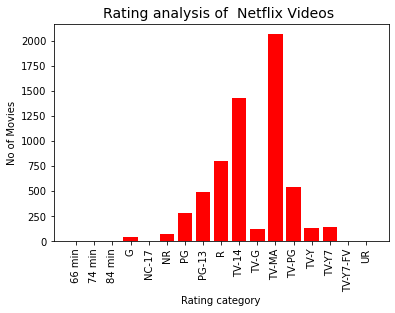

In [96]:
plt.bar(movies_rating.index, movies_rating.show_id, color='red')
plt.title('Rating analysis of  Netflix Videos ', size=14)
plt.xlabel('Rating category')
plt.ylabel('No of Movies')
plt.xticks(rotation=90)
plt.show()

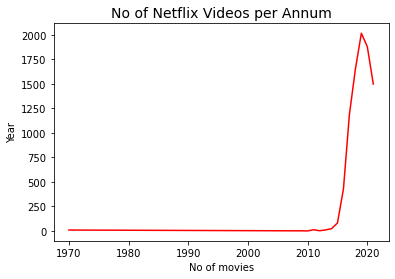

In [99]:
# yearly release
yearData = data.groupby('yearAdded').count()
yearData = pd.DataFrame(yearData.show_id)

plt.plot(yearData.index, yearData.show_id, color='red')
plt.title('No of Netflix Videos per Annum', size=14)
plt.xlabel('No of movies')
plt.ylabel('Year')
plt.show()

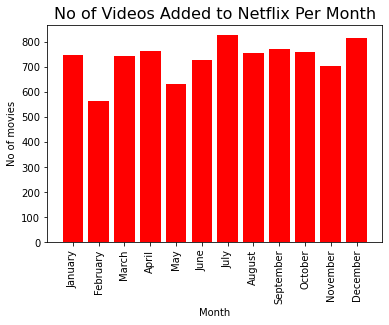

In [24]:
monthData = data.groupby('monthName').count()
monthData = pd.DataFrame(monthData.show_id)
months = [ 'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthData = monthData.reindex(months)

plt.bar(monthData.index, monthData.show_id, color='red')
plt.title('No of Videos Added to Netflix Per Month', size=16)
plt.ylabel('No of movies')
plt.xlabel('Month')
plt.xticks(rotation = 90)
plt.show()

### Netflix videos breakdown

In [23]:
set(netflix_data.type)

{'Movie', 'TV Show'}

In [26]:
netflix_movies = data[data.type == 'Movie']
netflix_series = data[data.type == 'TV Show']

In [70]:
netflix_type = data.groupby('type').count()
netflix_type = pd.DataFrame(netflix_type.show_id)
netflix_type

,show_id
type,
Movie,6131
TV Show,2676


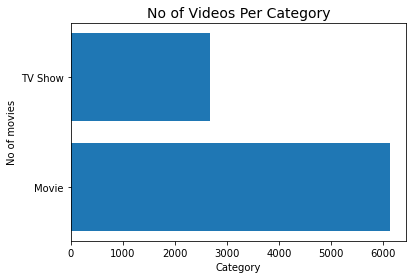

In [102]:
plt.barh(netflix_type.index, netflix_type.show_id)

plt.title('No of Videos Per Category', size=14)
plt.ylabel('No of movies')
plt.xlabel('Category')

plt.show()

In [83]:
release_year = data.groupby('release_year').count()
release_year = pd.DataFrame(release_year.show_id)

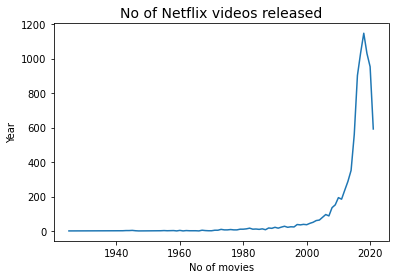

In [66]:
plt.plot(release_year.index, release_year.show_id)
plt.title('No of Netflix videos released', size=14)
plt.xlabel('No of movies')
plt.ylabel('Year')

plt.show()

#### Netflix Movies Analysis

In [30]:
netflix_movies.sample(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,dateAdded,monthAdded,yearAdded,monthName,title_no_stopwords
6859,s6860,Movie,God Knows Where I Am,"Jedd Wider, Todd Wider",Lori Singer,United States,"October 22, 2018",2016,TV-PG,103 min,Documentaries,"Through diary entries, this documentary follow...",2018-10-22,10,2018,October,"[Lori, Singer]"
8531,s8532,Movie,The Time Machine,Simon Wells,"Guy Pearce, Samantha Mumba, Jeremy Irons, Mark...","United States, United Arab Emirates","November 23, 2019",2002,PG-13,96 min,"Action & Adventure, Sci-Fi & Fantasy","Based on the H.G. Wells classic, this adventur...",2019-11-23,11,2019,November,"[Guy, Pearce,, Samantha, Mumba,, Jeremy, Irons..."


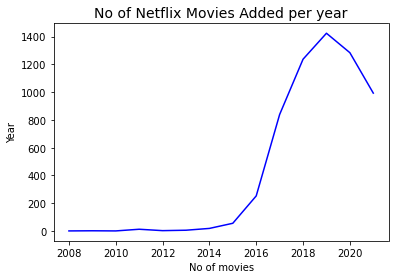

In [103]:
# yearly release
yearData1 = netflix_movies.groupby('yearAdded').count()
yearData1 = pd.DataFrame(yearData1.show_id)

plt.plot(yearData1.index, yearData1.show_id, color='blue')
plt.title('No of Netflix Movies Added per year', size=14)
plt.xlabel('No of movies')
plt.ylabel('Year')
plt.show()

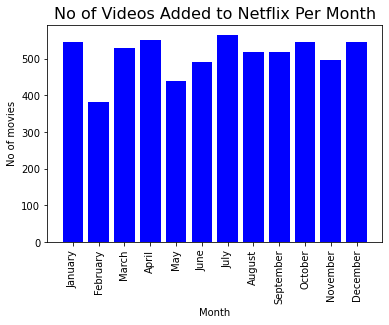

In [35]:
monthData1 = netflix_movies.groupby('monthName').count()
monthData1 = pd.DataFrame(monthData1.show_id)
months = [ 'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthData1 = monthData1.reindex(months)

plt.bar(monthData1.index, monthData1.show_id, color='blue')
plt.title('No of Videos Added to Netflix Per Month', size=16)
plt.ylabel('No of movies')
plt.xlabel('Month')
plt.xticks(rotation = 90)
plt.show()

In [91]:
movies_rating = netflix_movies.groupby('rating').count()
movies_rating = pd.DataFrame(movies_rating.show_id)


### Netflix Series Analysis

In [54]:
netflix_series.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,dateAdded,monthAdded,yearAdded,monthName,title_no_stopwords
1,s2,TV Show,Blood & Water,0,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021-09-24,9,2021,September,"[Ama, Qamata,, Khosi, Ngema,, Gail, Mabalane,,..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",0,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021-09-24,9,2021,September,"[Sami, Bouajila,, Tracy, Gotoas,, Samuel, Jouy..."


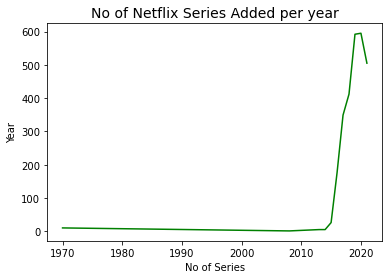

In [104]:
# yearly release
yearData2 = netflix_series.groupby('yearAdded').count()
yearData2 = pd.DataFrame(yearData2.show_id)

plt.plot(yearData2.index, yearData2.show_id, color='g')
plt.title('No of Netflix Series Added per year', size=14)
plt.xlabel('No of Series')
plt.ylabel('Year')
plt.show()

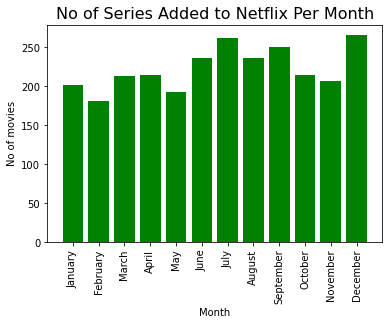

In [76]:
monthData2 = netflix_series.groupby('monthName').count()
monthData2 = pd.DataFrame(monthData2.show_id)
months = [ 'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthData2 = monthData2.reindex(months)

plt.bar(monthData2.index, monthData2.show_id, color='g')
plt.title('No of Series Added to Netflix Per Month', size=16)
plt.ylabel('No of movies')
plt.xlabel('Month')
plt.xticks(rotation = 90)
plt.show()

In [75]:
seasonal_movies = netflix_series.groupby('duration').count()
seasonal_movies = pd.DataFrame(seasonal_movies.show_id)
seasonal_movies

,show_id
duration,
1 Season,1793
10 Seasons,7
11 Seasons,2
12 Seasons,2
13 Seasons,3
15 Seasons,2
17 Seasons,1
2 Seasons,425
3 Seasons,199


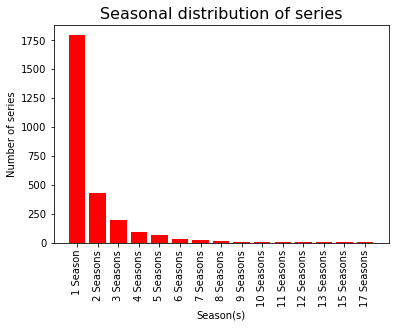

In [82]:

seasons = [ '1 Season', '2 Seasons', '3 Seasons', '4 Seasons', '5 Seasons', '6 Seasons', '7 Seasons', '8 Seasons', '9 Seasons', '10 Seasons', '11 Seasons', '12 Seasons', '13 Seasons', '15 Seasons', '17 Seasons']
seasonal_movies = seasonal_movies.reindex(seasons)

plt.bar(seasonal_movies.index, seasonal_movies.show_id, color='r')
plt.title('Seasonal distribution of series', size=16)
plt.ylabel('Number of series')
plt.xlabel('Season(s)')
plt.xticks(rotation = 90)
plt.show()

C:\Users\sadeo\AppData\Local\Temp/ipykernel_7788/3605796767.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_series['title_no_stopwords'] = netflix_series['title'].apply(lambda x: [item for item in str(x).split() if item not in stop_words])


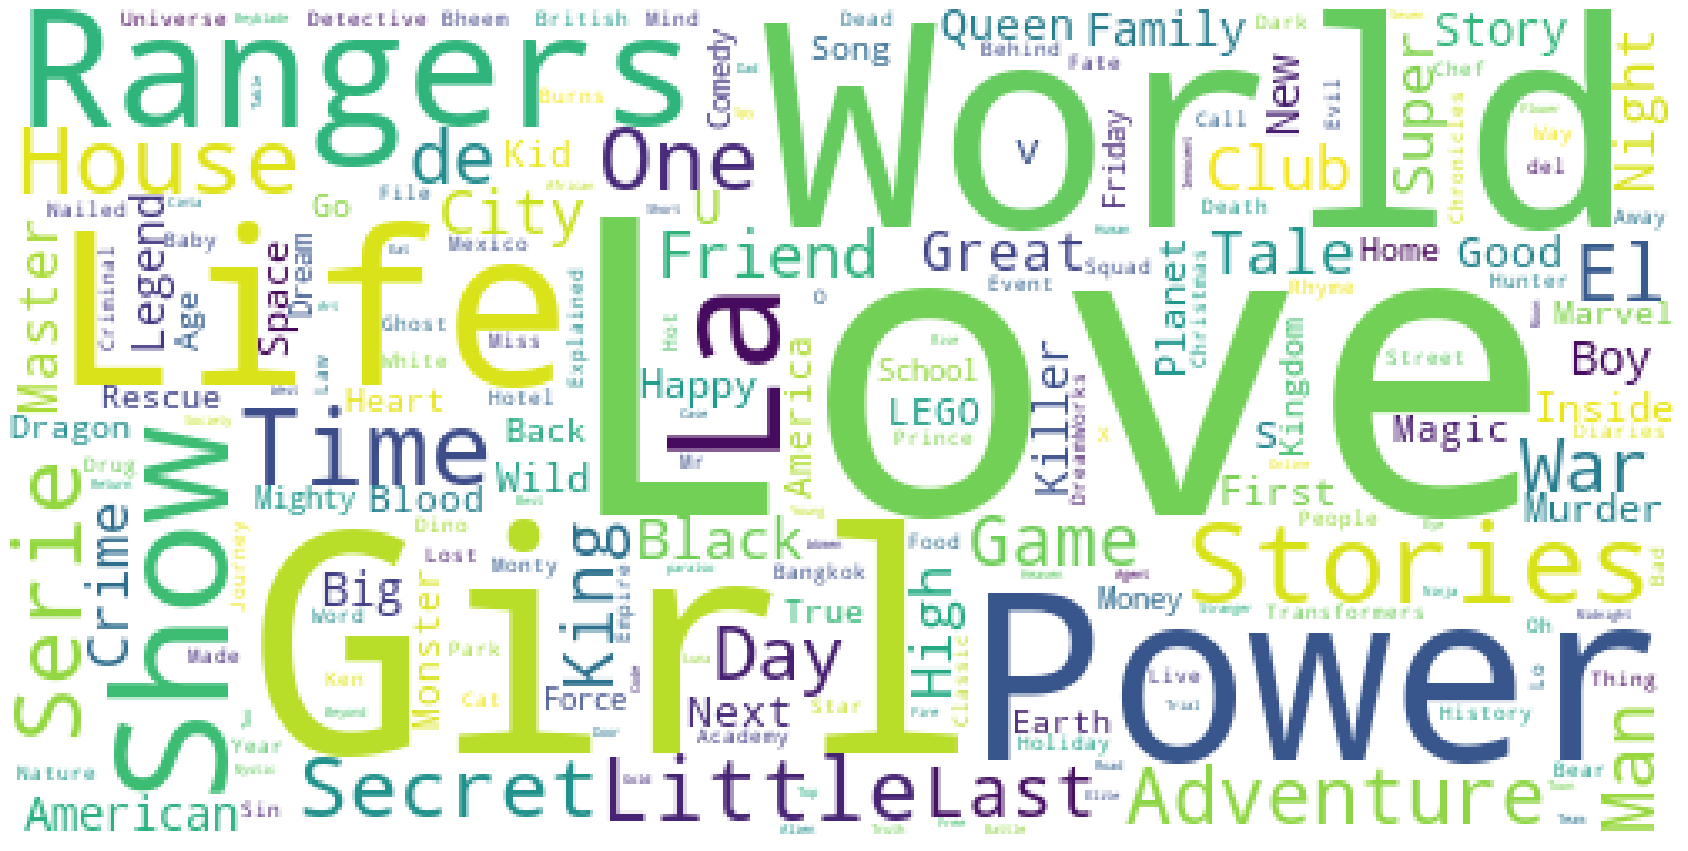

In [55]:
stop_words = set(stopwords.words('english'))
netflix_series['title_no_stopwords'] = netflix_series['title'].apply(lambda x: [item for item in str(x).split() if item not in stop_words])

all_words = list([a for b in netflix_series['title_no_stopwords'].tolist() for a in b])
all_words_str = ' '.join(all_words) 

def plot_cloud(wordcloud):
    plt.figure(figsize=(30, 20))
    plt.imshow(wordcloud) 
    plt.axis("off");

wordcloud = WordCloud(width = 500, height = 250, random_state=1, background_color='white', 
                      colormap='viridis', collocations=False).generate(all_words_str)
plot_cloud(wordcloud)

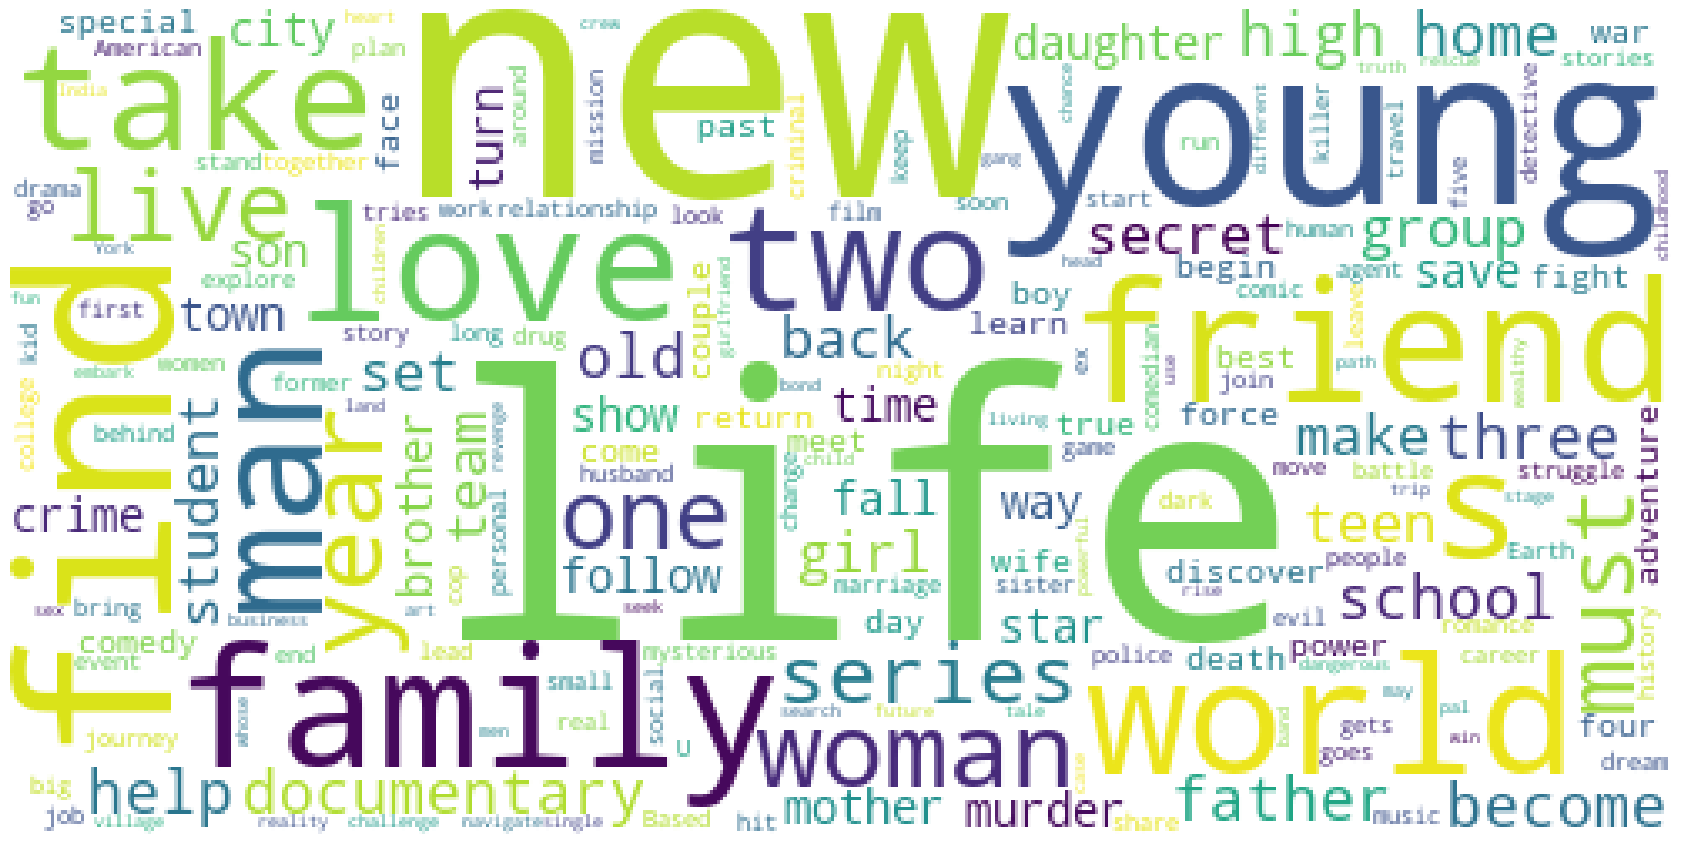

In [14]:
stop_words = set(stopwords.words('english'))
data['title_no_stopwords'] = data['description'].apply(lambda x: [item for item in str(x).split() if item not in stop_words])

all_words = list([a for b in data['title_no_stopwords'].tolist() for a in b])
all_words_str = ' '.join(all_words) 

def plot_cloud(wordcloud):
    plt.figure(figsize=(30, 20))
    plt.imshow(wordcloud) 
    plt.axis("off");

wordcloud = WordCloud(width = 500, height = 250, random_state=1, background_color='white', 
                      colormap='viridis', collocations=False).generate(all_words_str)
plot_cloud(wordcloud)

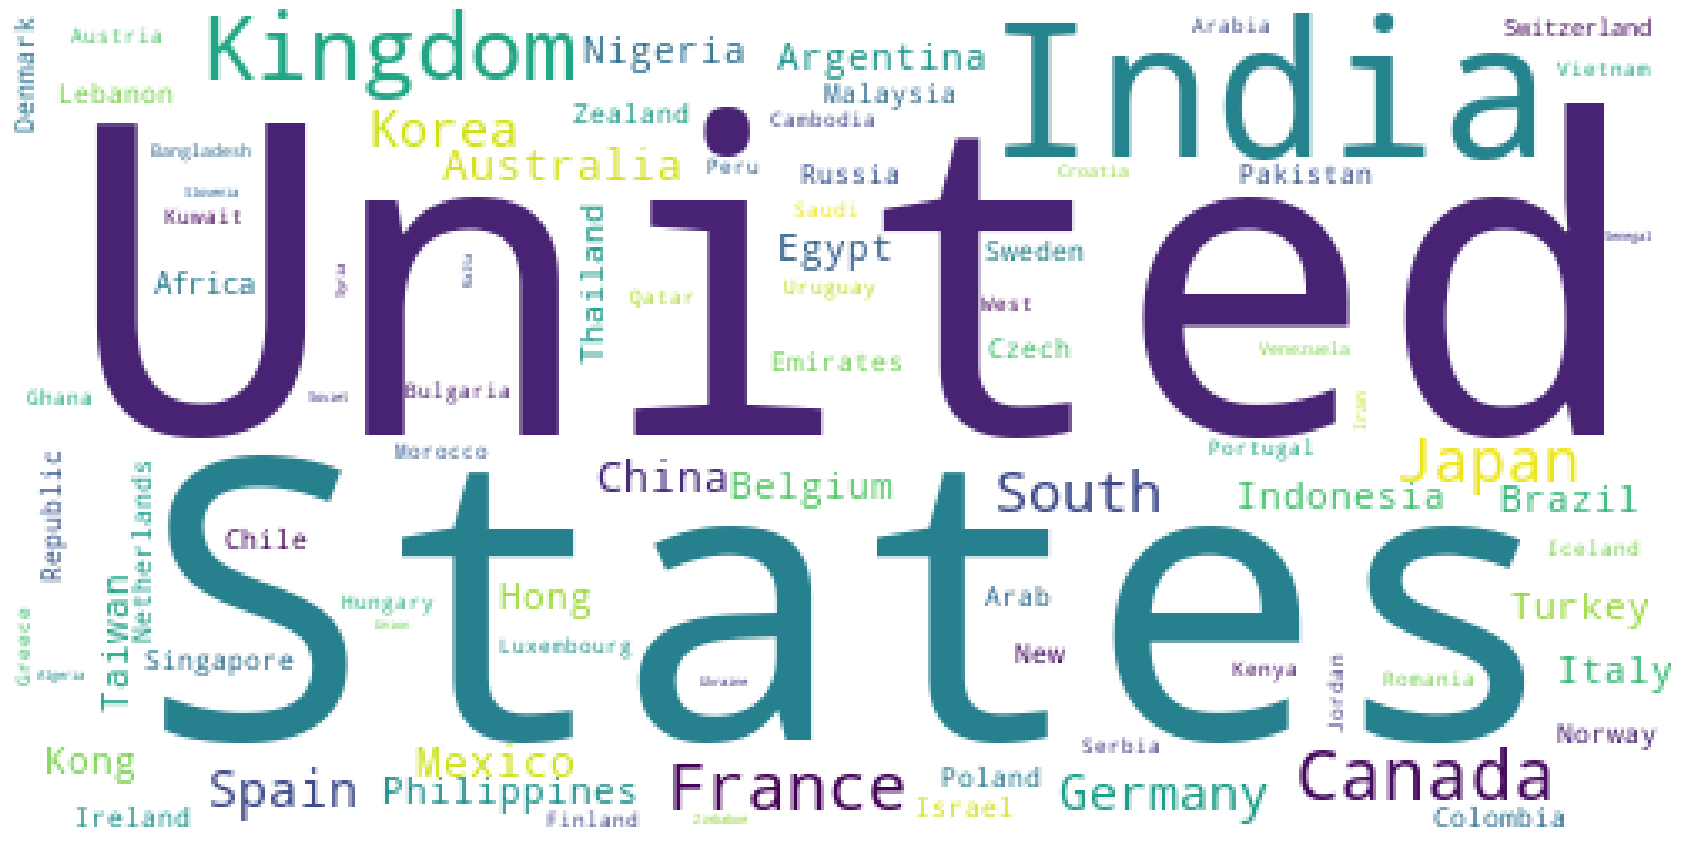

In [15]:
stop_words = set(stopwords.words('english'))
data['title_no_stopwords'] = data['country'].apply(lambda x: [item for item in str(x).split() if item not in stop_words])

all_words = list([a for b in data['title_no_stopwords'].tolist() for a in b])
all_words_str = ' '.join(all_words) 

def plot_cloud(wordcloud):
    plt.figure(figsize=(30, 20))
    plt.imshow(wordcloud) 
    plt.axis("off");

wordcloud = WordCloud(width = 500, height = 250, random_state=1, background_color='white', 
                      colormap='viridis', collocations=False).generate(all_words_str)
plot_cloud(wordcloud)

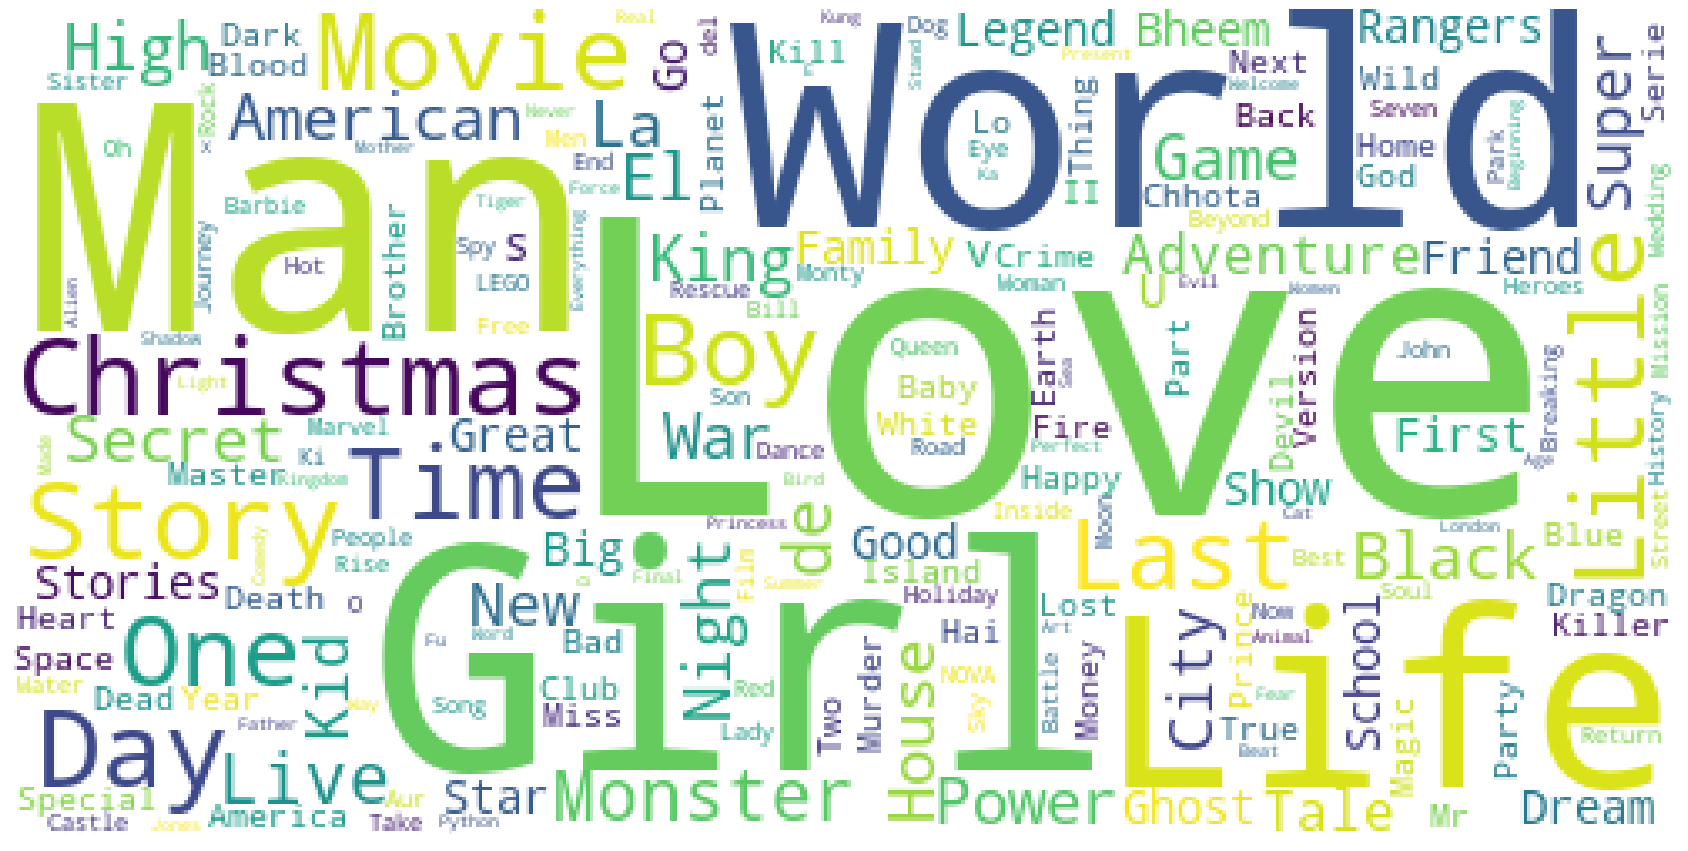

In [16]:
stop_words = set(stopwords.words('english'))
data['title_no_stopwords'] = data['title'].apply(lambda x: [item for item in str(x).split() if item not in stop_words])

all_words = list([a for b in data['title_no_stopwords'].tolist() for a in b])
all_words_str = ' '.join(all_words) 

def plot_cloud(wordcloud):
    plt.figure(figsize=(30, 20))
    plt.imshow(wordcloud) 
    plt.axis("off");

wordcloud = WordCloud(width = 500, height = 250, random_state=1, background_color='white', 
                      colormap='viridis', collocations=False).generate(all_words_str)
plot_cloud(wordcloud)

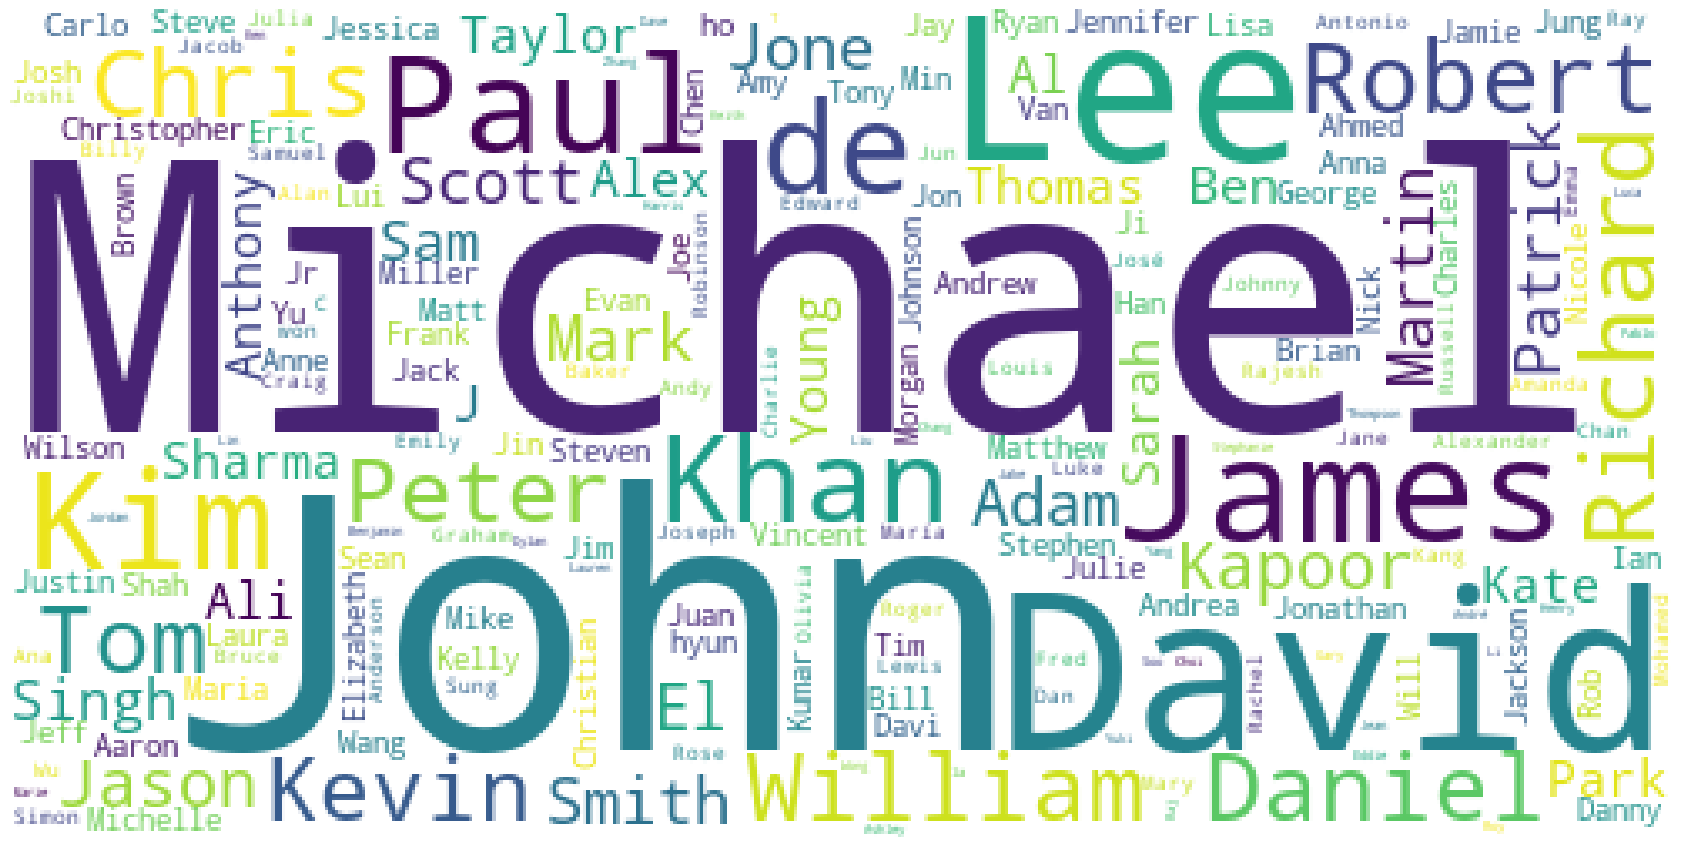

In [17]:
stop_words = set(stopwords.words('english'))
data['title_no_stopwords'] = data['cast'].apply(lambda x: [item for item in str(x).split() if item not in stop_words])

all_words = list([a for b in data['title_no_stopwords'].tolist() for a in b])
all_words_str = ' '.join(all_words) 

def plot_cloud(wordcloud):
    plt.figure(figsize=(30, 20))
    plt.imshow(wordcloud) 
    plt.axis("off");

wordcloud = WordCloud(width = 500, height = 250, random_state=1, background_color='white', 
                      colormap='viridis', collocations=False).generate(all_words_str)
plot_cloud(wordcloud)